<a href="https://colab.research.google.com/github/qhruddl51/Computer_Vision/blob/main/Tutorial02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Numpy
* Numerical Python의 줄임말
* 고성능 수치계산을 위해 제작된 C언어로 구현된 Python 라이브러리이다.
* 수학, 논리, 정렬, 선택, I/0, 이산 푸리에 변환, 기본적인 선형대수, 기본적인 통계 연산, 랜덤 시뮬레이션 등을 포함하여 배열에서의 빠른 연산을 위한 다양한 루틴을 제공한다. 

Numpy가 얼마나 막강한지 다음의 예제를 통해 살펴보자. 
두 개의 list a와 b는 각각 10만개의 양수로 구성되어 있고, i번째 요소 `c[i] = a[i] + 2*b[i]`인 list c를 구하고자 한다. 

* Numpy를 사용하지 않을 경우

In [14]:
# 해당 셀 수행에 걸리는 시간을 출력해줌
%%time 

a = list(range(100000)) # 0 ~ 99999
b = list(range(100000))

CPU times: user 1.97 ms, sys: 5.08 ms, total: 7.05 ms
Wall time: 7.01 ms


In [15]:
%%time 

for _ in range (10) : 
    c = []
    for i in range(100000) :
        c.append(a[i]+2*b[i]) 

CPU times: user 254 ms, sys: 25.6 ms, total: 280 ms
Wall time: 284 ms


* Numpy를 사용하는 경우

In [2]:
import numpy as np 

In [19]:
%%time 
a = np.arange(100000) # 0 ~ 99999 까지의 값을 가진 1차원 배열
b = np.arange(100000) 

CPU times: user 777 µs, sys: 79 µs, total: 856 µs
Wall time: 623 µs


In [20]:
%%time
for _ in range(10) : 
    c =  a+ 2*b

CPU times: user 3.23 ms, sys: 1.05 ms, total: 4.28 ms
Wall time: 5.82 ms


numpy를 사용하면 10~15배 (혹은 더 많이) 빠르게 결과를 얻을 수 있고, 더 짧은 코드로 작성할 수 있으며, 더 직관적이다. 

- Python은 일반적으로 자료형을 체크하고, 코드를 인터프리트하고 추상화를 지원하기 위해 필요한 추가 비용이 들기 때문에 무척 느리다. 예를 들어 반복문 안에서 덧셈을 한다고 가정하면, 반복문 내에서 매번 자료형을 체크하는 것이 실제 덧셈 연산보다 더 많은 명령어를 실행해야 한다. numpy는 미리 최적화하여 컴파일된 C코드를 사용해 많은 오버헤드를 줄일 수 있다. 
- 위에서 사용한 과정은 벡터화(Vectorization)이다. 벡터화는 각 개별 요소 대신에 배열에 연산을 적용할 수 있다. 

왜 벡터화를 하는가?
1. 매우 빠르다. 
2. 코드가 읽기 쉽고 더 짧다. 
3. 수학 기호와 더 가깝다. 

벡터화는 numpy가 강력한 가장 중요한 이유 중 하나이다.  

## 2.1 ndarray

- ndarray는 동일한 자료형의 n차원 배열로서 numpy에서 사용되는 기본 자료형이다.
- list와 달리 생성시 고정된 크기를 갖고, 동일한 자료형의 요소만을 허용하기 때문에 list보다는 유연성이 적다. 
- 그러나 실행시간과 메모리 측면에서 상당히 더 효과적이다. 

### 1) rank 와 shape 
* rank : 배열의 차원의 수(몇 중 배열인지)
* shape : 각 차원에서 배열의 크기를 나타내는 수로 이루어진 tuple

In [31]:
def print_np (x) : 
    print(x)
    print(f'(1) Type is {type(x)}')
    print(f'(2) Shape is {x.shape}')
    print(f'(3) Rank in {x.ndim}')
    print()

In [29]:
a = np.array([1,2,3]) # ndarray는 list([])를 이용해 초기화 가능
print_np(a)

[1 2 3]
(1) Type is <class 'numpy.ndarray'>
(2) Shape is (3,)
(3) Rank in 1


### 2) 배열의 요소 접근

In [33]:
a = np.array([1,2,3])
a_cpy = a.copy() # deep copy 된다. 

a[0] = 5
print_np(a)
print_np(a_cpy)

[5 2 3]
(1) Type is <class 'numpy.ndarray'>
(2) Shape is (3,)
(3) Rank in 1

[1 2 3]
(1) Type is <class 'numpy.ndarray'>
(2) Shape is (3,)
(3) Rank in 1



In [34]:
print(id(a))
id(a_cpy)

140349957400976


140349815647728

In [35]:
b = np.array([[1,2,3],
              [4,5,6]])
print_np(b)
print(b[0,0], b[0,1], b[1,0])

[[1 2 3]
 [4 5 6]]
(1) Type is <class 'numpy.ndarray'>
(2) Shape is (2, 3)
(3) Rank in 2

1 2 4


### 3) 배열의 초기화

Numpy는 다양한 초기화 방법을 제공한다. 
* 배열의 메모리 영역을 미리 만들어주고 값을 바꿔주는 방식으로 많이 사용된다. 

In [37]:
a = np.zeros((2,2)) # 모든 항이 0인 배열을 생성
print_np(a)

[[0. 0.]
 [0. 0.]]
(1) Type is <class 'numpy.ndarray'>
(2) Shape is (2, 2)
(3) Rank in 2



In [39]:
a = np.ones((3,5))
a

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [41]:
b = np.full((2,2), 7) # 상수 값을 갖는 배열 생성
b

array([[7, 7],
       [7, 7]])

In [42]:
c = np.eye(2) # 항등행렬(E)
print(c)

[[1. 0.]
 [0. 1.]]


In [44]:
d = np.random.random((2,2)) # 0-1 사이의 임의의 실수 
d

array([[0.03582272, 0.25155007],
       [0.64092917, 0.56839444]])

In [46]:
e = np.random.randint(100, 200, (2,2)) # 100 - 200 사이의 임의의 정수
e

array([[173, 185],
       [152, 114]])

### 4) 배열의 shape 변경
배열의 shape를 확인하는 것, 기존 데이터는 유지하면서 shape를 변경하는 것등은 매우 유용하다. 

In [47]:
nums = np.arange(8)
print_np(nums)

[0 1 2 3 4 5 6 7]
(1) Type is <class 'numpy.ndarray'>
(2) Shape is (8,)
(3) Rank in 1



In [48]:
nums = nums.reshape((2,4))
print_np(nums)

[[0 1 2 3]
 [4 5 6 7]]
(1) Type is <class 'numpy.ndarray'>
(2) Shape is (2, 4)
(3) Rank in 2



In [53]:
# reshape에서 -1은 해당 차원의 값을 numpy가 배열의 크기와 다른 차원의 값을 이용해 자동으로 계산하도록 한다. 
# 따라서 모르는 차원은 하나만 지정 가능  
# ndarray의 전체 요소의 수를 모를 때 사용하면 유용하다. 
nums = nums.reshape((4,-1))
print_np(nums)

nums = nums.reshape(-1)
print_np(nums) # 1차원으로 stretch

[[0 1]
 [2 3]
 [4 5]
 [6 7]]
(1) Type is <class 'numpy.ndarray'>
(2) Shape is (4, 2)
(3) Rank in 2

[0 1 2 3 4 5 6 7]
(1) Type is <class 'numpy.ndarray'>
(2) Shape is (8,)
(3) Rank in 1



### 5) 객체 지향 패러다임
Numpy는 객체지향 패러다임을 지원한다. 
따라서 ndarray는 Numpy namespace에서의 함수와 유사한 메서드와 속성을 가진다. 

In [54]:
nums

array([0, 1, 2, 3, 4, 5, 6, 7])

In [56]:
print(nums.min()) # ndarray의 메서드 
print(np.min(nums)) # Numpy namespace의 함수 

0
0


In [59]:
print(np.reshape(nums, (4,2)))
nums

[[0 1]
 [2 3]
 [4 5]
 [6 7]]


array([0, 1, 2, 3, 4, 5, 6, 7])

## 2.2 배열 연산 (Numerical operations on arrays)

### 1) 배열 원소간의 연산 (Element-wise operation)

* Numpy는 배열 원소간의 연산을 제공한다. 

In [63]:
x = np.array([[1,2],
              [3,4]], dtype = np.float64)
y = np.array([[5,6],
              [7,8]], dtype = np.float64)

# 덧셈
print(x + y, "\n")
print(np.add(x,y), "\n")
print(np.array_equal(x+y, np.add(x,y)))

[[ 6.  8.]
 [10. 12.]] 

[[ 6.  8.]
 [10. 12.]]
True


In [64]:
# 뺄셈
print(x - y, "\n")
print(np.subtract(x, y), "\n")
print(np.array_equal(x-y, np.subtract(x, y)))

[[-4. -4.]
 [-4. -4.]] 

[[-4. -4.]
 [-4. -4.]] 

True


In [66]:
print(x * y, "\n")
print(np.multiply(x, y), "\n")
print(np.array_equal(x*y, np.multiply(x, y)))
# 행렬의 곱셈이 아니라, 그냥 같은 위치의 요소끼리 곱한 것이다. 

[[ 5. 12.]
 [21. 32.]] 

[[ 5. 12.]
 [21. 32.]] 

True


In [67]:
print(x / y)
print(np.divide(x, y), "\n")

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]] 



In [68]:
print(np.sqrt(x)) # 제곱근

[[1.         1.41421356]
 [1.73205081 2.        ]]


### 2) 행렬 곱셈
* 주의!! `*`은 행렬곱셈이 아니라 원소들 간의 곱셈이다. 벡터들의 내적을 계산하거나 행렬과 벡터의 곱셈, 행렬과 행렬의 곱셈 등을 계산하기 위해서는 dot 함수를 사용한다. 
* dot는 numpy 모듈의 함수 또는 배열 객체의 인스턴스 메서드로 제공된다.


In [75]:
x = np.array([[1,2], [3,4]])
y = np.array([[5,6], [7,8]])

v = np.array([9,10])
w = np.array([11,12])

In [76]:
print(x.dot(y))
print(np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [77]:
print(x.dot(v))
print(np.dot(x, v))

[29 67]
[29 67]


In [78]:
# 1차원 ndarray(백터)는 행벡터도 될 수 있고, 열벡터도 될 수 있다. 
print(w.dot(v)) # 9*11 + 10*12 = 99 + 120 = 219 
print(np.dot(w, v))

219
219


### 3) 특정 축에 대한 연산
Numpy에서는 많은 유용한 함수가 제공되며, ndarray의 특정 축에서 적용이 가능하다. 

In [80]:
x = np.array([[1,2,3], 
              [4,5,6]])
print(np.sum(x)) # 모든 요소 값을 더해 반환
print(np.sum(x, axis = 0)) # 같은 열에 있는 요소 끼리 더한다. 
print(np.sum(x, axis = 1)) # 같은 행에 있는 요소끼리 더한다. 
print(np.max(x, axis = 1)) # 같은 행에 있는 요소끼리 비교해서 가장 큰 값을 구한다.

21
[5 7 9]
[ 6 15]
[3 6]


https://fgnt.github.io/python_crashkurs_doc/include/numpy.html
![](https://fgnt.github.io/python_crashkurs_doc/_images/numpy_array_t.png)

In [82]:
arr = np.arange(32)
v = arr.reshape([4,2,-1]) #  # 겉에서 속으로 들어가는 순서이다!!!!!!!!!!!!!!!!
print(v)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]]

 [[24 25 26 27]
  [28 29 30 31]]]


In [85]:
print(np.max(v, axis = 0))
print()
print(np.max(v, axis = 1))
print()
print(np.max(v, axis = 2))

[[24 25 26 27]
 [28 29 30 31]]

[[ 4  5  6  7]
 [12 13 14 15]
 [20 21 22 23]
 [28 29 30 31]]

[[ 3  7]
 [11 15]
 [19 23]
 [27 31]]


각 행에서 가장 큰 값을 가진 요소의 인덱스는 어떻게 구할까? 가령, 입력 영상에서 가장 큰 점수에 해당하는 클래스를 찾는 것에서 사용된다. 

In [88]:
x = np.array([[1,2,3], 
              [4,5,6]])

print(np.argmax(x))
print(np.argmax(x, axis = 1))
print(np.argmax(x, axis = 1))

5
[2 2]
[2 2]


`np.where`를 사용해 특정 조건을 만족하는 요소의 인덱스를 구할 수 있다. 

In [89]:
nums = np.array([1,2,3,4,5,6,7,8])
print(np.where(nums > 5))
print(nums[np.where(nums>5)]) # 인덱싱에 이용할 수 있다!

(array([5, 6, 7]),)
[6 7 8]


In [98]:
print(x)
print()
print(np.where(x > 3)) # 1행 0열, 1행 1열, 1행 2열 
type(np.where(nums > 3)) # 튜플에 담아준다. 

[[1 2 3]
 [4 5 6]]

(array([1, 1, 1]), array([0, 1, 2]))


tuple

연산을 특정 축(axis)에 적용하면, 해당 축의 차원이 shape에서 제거된다. 어느 축이 어디에 해당되는지를 이해하기 위해서는 꼭 기억해두자!
 

In [101]:
x = np.array([[1,2,3],
              [4,5,6]])
print(f'x nim : {x.ndim}')
print(f'x shape : {x.shape}')

print(x.max(axis=0))
print(f'x.max(axis=0) ndim : {x.max(axis=0).ndim}')
print(f'x.max(axis=0) shape : {x.max(axis=0).shape}')

x nim : 2
x shape : (2, 3)
[4 5 6]
x.max(axis=0) ndim : 1
x.max(axis=0) shape : (3,)


In [102]:
print(x.max(axis=1))
print(f'x.max(axis=1) ndim : {x.max(axis=1).ndim}')
print(f'x.max(axis=11) shape : {x.max(axis=1).shape}')

[3 6]
x.max(axis=1) ndim : 1
x.max(axis=11) shape : (2,)


In [104]:
x = np.array([
              [[1,2,3], 
              [4,5,6]], 
              [[10,23,33],
               [43,52,15]]
])

print(f'x ndim : {x.ndim}')
print(f'x shape : {x.shape}') # 겉에서 속으로 들어가는 순서이다!!!!!!!!!!!!!!!!
print()
print(x.max(axis = 1))
print(f'x.max(axis=1) ndim : {x.max(axis = 1).ndim}')
print(f'x.max(axis=1) shape : {x.max(axis = 1).shape}')

x ndim : 3
x shape : (2, 2, 3)

[[ 4  5  6]
 [43 52 33]]
x.max(axis=1) ndim : 2
x.max(axis=1) shape : (2, 3)


## 2.3 인덱싱(Indexing)
Numpy는 강력한 인덱싱 방법을 제공한다. 

In [125]:
a = np.arange(1, 13)
a = a.reshape((3,4))
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [126]:
print(a[1][0])
print(a[1,0])

5
5


### 1) 슬라이싱(Slicing)
- 뒤가 열린 하프오픈

In [127]:
print(f'Sliced (a[:2, 1:]) : \n {a[:2, 1:]}')

Sliced (a[:2, 1:]) : 
 [[2 3 4]
 [6 7 8]]


### 2) 스탭 슬라이싱(Step slicing)
- 인덱싱에서 스텝을 사용하면 유용함

In [131]:
 # 첫번째 행을 역순으로 출력
 print(a)
 print()
 print(a[0,:])
print(a[0,...]) # 첫번째 행만 추출
 print(a[0, ::-1])
 print(a[0,...])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

[1 2 3 4]
[4 3 2 1]
[1 2 3 4]


In [142]:
# n차원(n>=3) 배열은 `a[:, :]` 이렇게 인덱싱할 수 없다. 
a = [[[1,2,3], 
     [4,5,6]],
     [[7,8,9], 
      [10,11,12]]]

print(a[0])
# a[:, :] # error

[[1, 2, 3], [4, 5, 6]]


### 3) 팬시 인덱싱(Fancy Indexing)


* 가끔, 행렬의 각 행에서 특정 요소만 선택하거나 변경하는 것이 유용하다. 
이 때 팬시 인덱싱을 사용한 인덱스 배열을 사용하여 인덱싱할 수 있다. 
* 2차원 ndarray a **-->** a[행 인덱스배열,열 인덱스배열]

In [158]:
a = np.arange(1, 13)
a = a.reshape((4,3))
print(a)
print()

c = np.arange(4) # np.array([0, 1, 2, 3])과 같다. 
b = np.array([0, 2, 0, 1]) 
print(a[c, b])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

[ 1  6  7 11]


In [159]:
for x, y in zip(np.arange(4), b) :
    print(a[x, y], end = " ")

1 6 7 11 

In [160]:
c = a[0]
c[0] = 100
print(a) # 주소만 참조하는 것이다. 얕은 복사. 
# 따라서 원래 a에 연결된 객체에 접근해서 값을 바꾸는 것이다. 

[[100   2   3]
 [  4   5   6]
 [  7   8   9]
 [ 10  11  12]]


In [161]:
c = a[0]
print(c, "\n")
c[1] = 10000
print(c, "\n")
print(a)

[100   2   3] 

[  100 10000     3] 

[[  100 10000     3]
 [    4     5     6]
 [    7     8     9]
 [   10    11    12]]


In [163]:
a = np.arange(1,13).reshape(4,3)
print(a, "\n")

b = np.array([0,2,0,1])
a[np.arange(4), b] += 10 # 배열 a의 해당하는 요소의 값을 변경
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] 

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


### 4) 불리언 인덱싱 혹은 마스크(Boolean indexing or mask)

불리언 인덱스는 배열의 인덱스가 True 혹은 False 값을 가지게 해 True인 경우에만 해당 배열의 값을 출력하게 한다. 

In [165]:
# MAX 값보다 큰 요소에 대해 MAX 값으로 설정하려고 함.
MAX = 5
nums = np.array([1, 4, 10, -1, 15, 0, 5])
print(nums > MAX) # 불리언 벡터이다. 스칼라와 벡터의 비교, 브로드캐스팅...

[False False  True False  True False False]


In [168]:
print(nums[nums > MAX])
nums[nums > MAX] = MAX # 이것이 바로 불리언 인덱싱이다!
nums

[10 15]


array([ 1,  4,  5, -1,  5,  0,  5])

In [214]:
nums = np.array([1, 4, 10, -1, 15, 0, 5])
print(nums[[1,2,3,0]]) 
# 마스크 : 여러 인덱스를 지정하기 위해 리스트에 인덱스를 담아서 넘겨주는 방식 

[ 4 10 -1  1]


## 2.4 브로드캐스팅 (Braodcasting)
-> 내적과는 다르다!

http://www.astroml.org/book_figures/appendix/fig_broadcast_visual.html
![대체 텍스트](http://www.astroml.org/_images/fig_broadcast_visual_1.png)

In [177]:
# matrix와 vector의 뺄셈
x = np.array([[1, 2, 3],
              [3, 5, 7]])
print(x.shape)

col_means = x.mean(axis = 0)
print(col_means)
print(col_means.shape)

mean_shifted = x - col_means
print(mean_shifted)

(2, 3)
[2.  3.5 5. ]
(3,)
[[-1.  -1.5 -2. ]
 [ 1.   1.5  2. ]]


In [178]:
# matrix와 스칼라의 곱셈
print(x*2)

[[ 2  4  6]
 [ 6 10 14]]


두 개의 배열을 브로드캐스팅하는 데 따르는 규칙
1. 두 배열의 rank가 같지 않다면, 배열의 rank가 같아질 때까지 낮은 rank를 가진 배열 앞에 1씩 붙인다.
2. **두 배열의 차원에서 같은 크기거나 차원에서 둘 중 한 배열의 크기가 1일 때, 해당 차원에서 호환이 된다고 한다.**
3. 두 배열이 모든 차원에서 호환이 될 때, 브로드캐스트 할 수 있다.
4. **브로드캐스팅 후, 각 배열은 마치 두 입력 배열 요소의 최대와 모양이 같다.**
5. 한 배열의 크기가 1이고 다른 배열의 크기가 1보다 큰 차원에서 첫 번째 배열은 마치 해당 차원을 다라 복사된 것처럼 동작한다. 

예를 들어, (2, 3)과 (3,) 모양의 두 배열을 가지고 column 값을 빼는 경우를 보자. 
1. 두 배열의 rank가 같지 않으므로 낮은 rank 배열 앞에 1을 붙여 (1,3)으로 만든다. 
2. (2,3)과 (1,3) 행렬이 연산이 된다. 
3. 모든 차원에서 호환이 되므로 브로드캐스트 할 수 있다.
4. 브로드 캐스팅 후, 각 배열은 마치 (2,3)과 같은 모양을 가진다. 
5. 더 작은 배열은 마치 차원 0을 따라 복사된 것 처럼 동작한다.  



In [189]:
x = np.array([[1,2,3], 
              [3,5,7]])

row_means = x.mean(axis = 1)
print(row_means)
print(row_means.shape)
# mean_shifted = x - row_means ## -> (2,3)과 (1,2)은 호환이 안되므로 연산 불가능

[2. 5.]
(2,)


row_means의 모양을 재구성한다면 원하는 답을 얻을 수 있다. 

In [191]:
expanded_row_means = np.expand_dims(row_means, axis=1) # (2,) -> (2,1)
print(expanded_row_means)
print("재구성한 row_means의 차원 : ",expanded_row_means.shape)
print()

mean_shifted = x - expanded_row_means # 이제 (2,3)과 (2,1)은 호환이 된다. 
print(mean_shifted)

[[2.]
 [5.]]
재구성한 row_means의 차원 :  (2, 1)

[[-1.  0.  1.]
 [-2.  0.  2.]]


다양한 브로드캐스팅 examples!

In [192]:
# 벡터 외적 계산
v = np.array([1,2,3]) # (3,)
w = np.array([4,5])  # (2,)

# 외적 계산을 위해서 먼저 v를 column 형태로 재구성한다. -> (3,1)
# 벡터 v와 w를 외적했을 때, 출력 모양은 (3,2)
print(np.reshape(v, (3,1))*w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [196]:
# 행렬의 각 row에 벡터 추가하기 
x = np.array([[1,2,3], [4,5,6]]) # (2,3)
v = np.array([1,2,3]) # (3,) -> (1,3)
print(x, "\n")
print(v, "\n")
print(x+v)

[[1 2 3]
 [4 5 6]] 

[1 2 3] 

[[2 4 6]
 [5 7 9]]


In [201]:
# 행렬의 각 column에 벡터 추가하기 
x = np.array([[1,2,3], [4,5,6]]) # (2,3)
w = np.array([4,5])  # (2,)

# x를 transpose해 (3,2)를 만들고 w에 대해 브로드캐스트 하여 (3,2) 모양을 얻을 수 있다. 
# 다시 행렬 모양을 원상복구해준다. 
print(x, "\n")
print(x.T, "\n")
print(x.T + w, "\n")
print((x.T + w).T, "\n")

# w를 (2,) -> (2,1)로 바꾸어 주고 계산해도 동일한 결과 
print(x + np.reshape(w, (2,1))) 

[[1 2 3]
 [4 5 6]] 

[[1 4]
 [2 5]
 [3 6]] 

[[ 5  9]
 [ 6 10]
 [ 7 11]] 

[[ 5  6  7]
 [ 9 10 11]] 

[[ 5  6  7]
 [ 9 10 11]]


* 배열에서 view는 copy와 다르게, view와 배열이 서로 데이터를 공유한다. 
때로는 결과가 배열의 복사본이지만 다른 경우에는 view가 될 수도 있다. 
* 예기치 않은 문제를 피하려면 각각의 생성시기를 이해하는 것이 중요하다. 
* 배열의 slice로부터 view를 생성해 같은 데이터 영역에서 dtype을 변경하거나 값을 변경할 수 있다.  

In [203]:
x = np.arange(5)
print('Original : ', x)

view = x[1:3]
print(view)

Original :  [0 1 2 3 4]
[1 2]


In [204]:
view[1] = -1
print(x) # 원본도 바뀌었다. 메모리를 공유하므로, 같은 곳을 참조하므로 

[ 0  1 -1  3  4]


In [205]:
x[2] = 10
print(view) # 카피후에 원본을 바꾸면, view도 바뀐다. 

[ 1 10]


팬시인덱싱(배열/리스트로 인덱스를 일일히 지정해주는 것)을 사용하면 결과는 view(얕은 복사)가 아닌 copy(깊은 복사)가 된다. 

In [219]:
x = np.arange(5)
print('Original x : ', x)

copy = x[[1,2]]
print("Original copy : ", copy)

copy[1] = -1
print("copy : ", copy)
print("x : ", x) # 사본을 수정해도 원본은 그대로 

Original x :  [0 1 2 3 4]
Original copy :  [1 2]
copy :  [ 1 -1]
x :  [0 1 2 3 4]


In [217]:
copy = x[x>=2] # 불린 인덱싱
print(copy)
x[3] = 10

print("x : ", x)
print("copy : ", copy) # 카피 후, 원본을 수정했지만 사본은 그대로이다. 
# 불린 인덱싱은 인덱스 역할로 불린 벡터를 넘겨주는 것이므로 깊은 복사가 된다!!!!

[2 3 4]
x :  [ 0  1  2 10  4]
copy :  [2 3 4]


## 2.5 성능 개선

* Numpy는 C로 작성된 Python의 확장이므로 Numpy 연산은 Python에서 동일한 연산을 할 때보다 빠르다. 
* 예를 들면, 두 개의 Numpy 배열의 행렬 곱셈은 배열을 나타내는 python의 list를 반복하며 알맞은 요소를 곱하는 작업보다 훨씬 빠르다.
* 따라서 가능한한 python으로 for 루프를 사용하는 것보다 numpy 배열을 사용하는 것이 좋다. 

### 1) 사전 할당 (Pre-allocation)

Numpy는 동적 배열 할당을 지원하지 않는다. 따라서 미리 배열을 위한 공간을 할당해야 한다. 

In [220]:
A = np.zeros(10) # 모든 요소 값이 0인 배열을 생성(사전 할당)

for i in range(10) : 
    A[i] = 5

print(A)

[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


`numpy.append()`와 같은 메소드를 사용해 배열의 크기를 늘릴 수 있다. 

In [5]:
A = np.array([5])
for i in range(9) : 
    A = np.append(A, [5])
    print(A)

[5 5]
[5 5 5]
[5 5 5 5]
[5 5 5 5 5]
[5 5 5 5 5 5]
[5 5 5 5 5 5 5]
[5 5 5 5 5 5 5 5]
[5 5 5 5 5 5 5 5 5]
[5 5 5 5 5 5 5 5 5 5]


* 사전 할당 대신 append()와 같은 크기 조정 메서드를 사용하는 경우, 배열의 크기가 증가할 때마다 모든 요소를 다시 복사해야 한다. -> 시간이 오래 걸린다. 
* 따라서 가능하면 항상 사전할당하는 것이 더 좋다. 

### 2) 매개변수로서의 벡터
대부분의 Numpy 함수는 벡터 또는 행렬을 매개 변수로 전달하는 것을 지원한다. 

In [6]:
# 이터레이터 A의 각 요소에 sin을 취해 배열 B에 저장하려고 할 때
A = range(10)
B = np.zeros(10)

for i in range(10):
    B[i] = np.sin(A[i]) # range 객체도 인덱싱하는 것처럼 가능..

print(B)

<class 'range'>
[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849]


In [7]:
# 동일한 작업을 numpy를 이용해 할 수 있다.
B = np.sin(A)
print(B)

[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849]


In [8]:
B = np.power(A, 2) # 제곱
print(B)

[ 0  1  4  9 16 25 36 49 64 81]


### 3) 논리적 인덱싱 (Logical indexing)


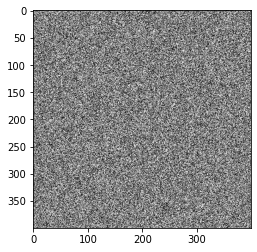

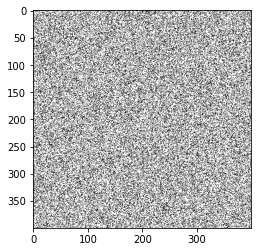

In [9]:
# m x n 의 2D 배열을 가지고 있고 모든 요소(0~255)에 대해 
# 100보다 큰 수는 255로 설정하고자 한다. 
import matplotlib.pyplot as plt

m = 400
n = 400
A = np.random.randint(255, size =(m,n))
plt.imshow(A, cmap = 'gray')
plt.show()

# 1) 이중 for loop 이용
newA = A
for i in range(m) : 
    for j in range(n) : 
        if A[i,j] > 100 :
            newA[i, j] = 255

plt.imshow(newA, cmap = 'gray')
plt.show()

[[ True False  True ...  True False False]
 [ True  True False ... False False  True]
 [False  True  True ...  True False False]
 ...
 [ True False  True ... False  True False]
 [ True  True  True ... False  True False]
 [False False  True ... False  True  True]]


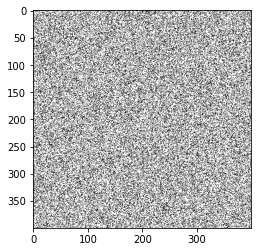

In [10]:
# 2) 
newA = A

B = A>100 # 불린 메트릭스
print(B)

newA[B] = 255
plt.imshow(newA, cmap = 'gray')
plt.show()

## 2.6 성능 평가
* Python 패키지 time을 이용해 시간 성능을 평가할 수 있다. 

In [14]:
import time
start = time.time()

##
A = np.array([np.random.randint(255)])
print(A)
for i in range(100) : 
    A = np.append(A, [np.random.randint(255)])
    pass # for 
    
print(A)
print(len(A))
##

end = time.time()
print(end - start)

[85]
[ 85  47 186 247 208  32 243 165 196 235  53  36  27 123 201  46 249 203
 103 181 202  53 245 187  25  13 239 192 137 225  73  63 100 246  24 190
 237 215  26 127 180 124  78  72  27 220  27 143  72  14 196 217 132   5
 241   4 211  23  73 155  29 204   0 103 164 251  48  64   8  65 143 240
 203 126 213 201 165 104 220  96 186  79 119 156  11 120 173  23 141  57
  16   9   8 179 176 223  58 219 173 206 131]
101
0.005912065505981445


In [15]:
%%time 
# 쥬피터 노트북에서 제공하는 기능(한 셀 수행에 소요되는 시간)

A = np.array([np.random.randint(255)])
print(A)
for i in range(100) : 
    A = np.append(A, [np.random.randint(255)])
    pass # for 
    
print(A)
print(len(A))

end = time.time()
print(end - start)

[94]
[ 94  11 199 102 156  81  86 166 202 136  68 148 148  36 231 125 128 166
 114  90 148 123  46 107  77 100 132 237 220  18 228 198  52 210 242 107
 137 131  10 122   7 242  12  94  86 122 169 102  17  38 180  46 114 210
 235 145 142 181 188  62  85   6 151 131  81  28 127 211 220 122 206  95
 182 126  96 214  51  54  49  28 249 170  66 250 219 251 132 239 233  92
 240 199  27  30 111  75 196 143 228 121 229]
101
95.66520524024963
CPU times: user 4.18 ms, sys: 73 µs, total: 4.25 ms
Wall time: 4.53 ms


## 2.7 요약

1. Numpy는 매우 강력한 라이브러리로서 계산을 위한 효율 향상과 편리함을 제공한다. 
2. Vectorization으로 훨씬 더 빠른 속도
3. 배열의 모양을 추적하는 데 유용하다.
4. 많은 유용한 수학 함수와 연산이 내장돼 있다. 
5. 강력한 인덱싱 스키마를 사용해 데이터를 선택하고 조작할 수 있다.
6. 브로드캐스팅을 통해 다양한 모양의 배열에서 계산이 가능하다. 
7. View와 Copy에 주의하자!